In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [5]:
pip install scikit-learn


  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl (42.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [7]:
pip install catboost

   ---------------------------------------- 0.0/101.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.2 MB 2.7 MB/s eta 0:00:38
   ---------------------------------------- 0.2/101.2 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 0.4/101.2 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 0.5/101.2 MB 2.9 MB/s eta 0:00:35
   ---------------------------------------- 0.6/101.2 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 0.8/101.2 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.9/101.2 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 1.1/101.2 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 1.2/101.2 MB 3.1 MB/s eta 0:00:32
    --------------------------------------- 1.3/101.2 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 1.5/101.2 MB 3.1 MB/s eta 0:00:32
    --------------------------------------- 1.6/101.2 MB 3.1 MB/s eta 0

In [8]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 2.0 MB/s eta 0:00:49
   ---------------------------------------- 0.1/99.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.2/99.8 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.2/99.8 MB 1.2 MB/s eta 0:01:20
   ---------------------------------------- 0.2/99.8 MB 1.3 MB/s eta 0:01:20
   ---------------------------------------- 0.4/99.8 MB 1.4 MB/s eta 0:01:12
   ---------------------------------------- 0.5/99.8 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.6/99.8 MB 1.6 MB/s eta 0:01:03
   ---------------------------------------- 0.7/99.8 MB 1.7 MB/s eta 0:00:58
   ---------------------------------------- 0.8/99.8 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 0.9/99.8 MB 1.7 MB/s eta 0:00:57
   ---------------------------------------- 1.0/99.8 MB 1.8 MB/s eta 0:00:55
   ---

In [10]:
df = pd.read_csv('D:/MLProject/notebook/data/stud.csv')
df.head(3)

gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93

In [11]:
X = df.drop(columns='math score', axis=1)
X

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  reading score  writing score  
0                      none             72             74  
1                 completed             90             88  
2                      none             95             93  
3                      none             57             44  
4                      none             78             75  
..                      ...            ...            ...  
995               completed             99             95  
996                    none             55             55  
997               completed             71             65  
998               completed             78             77  
999                    none             86             86  

[1000 rows x 7 columns]

In [12]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [13]:
for col in X.columns:
    if col not in ['reading score', 'writing score']:
        print('Categories in {0} are {1}'.format(col, df[col].unique()))

Categories in gender are ['female' 'male']
Categories in race/ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch are ['standard' 'free/reduced']
Categories in test preparation course are ['none' 'completed']


In [14]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

col_transformer = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features), 
        ("StandardScalar", num_transformer, num_features),
    ]
)

In [15]:
X = col_transformer.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [17]:
X.shape

(1000, 19)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

X_train shape: (800, 19)
y_train shape: (800,)
X_test shape: (200, 19)
y_test shape: (200,)


In [19]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "Catboosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for name,model in models.items():
    model.fit(X_train,y_train)             #train model

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(name)
    model_list.append(name)

    print("Model performance for Training set")
    print("Root mean squared error: {:4f}".format(model_train_rmse))
    print("Mean Absolute error: {:4f}".format(model_train_mae))
    print("R2 Score: {:4f}".format(model_train_r2))

    print('------------------------------------')

    print("Model performance for Test set")
    print("Root mean squared error: {:4f}".format(model_test_rmse))
    print("Mean Absolute error: {:4f}".format(model_test_mae))
    print("R2 Score: {:4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')




Linear Regression
Model performance for Training set
Root mean squared error: 5.327359
Mean Absolute error: 4.278809
R2 Score: 0.874114
------------------------------------
Model performance for Test set
Root mean squared error: 5.409603
Mean Absolute error: 4.225937
R2 Score: 0.879740


Lasso
Model performance for Training set
Root mean squared error: 6.593816
Mean Absolute error: 5.206303
R2 Score: 0.807146
------------------------------------
Model performance for Test set
Root mean squared error: 6.519695
Mean Absolute error: 5.157882
R2 Score: 0.825320


Ridge
Model performance for Training set
Root mean squared error: 5.323325
Mean Absolute error: 4.264988
R2 Score: 0.874304
------------------------------------
Model performance for Test set
Root mean squared error: 5.390387
Mean Absolute error: 4.211101
R2 Score: 0.880593


K-Neighbors Regressor
Model performance for Training set
Root mean squared error: 5.712219
Mean Absolute error: 4.518750
R2 Score: 0.855268
-----------------

In [24]:
pd.DataFrame(list(zip(list(models.keys()), r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

Model Name  R2_Score
2                    Ridge  0.880593
0        Linear Regression  0.879740
5  Random Forest Regressor  0.852983
7    Catboosting Regressor  0.851632
8       AdaBoost Regressor  0.849239
6             XGBRegressor  0.827797
1                    Lasso  0.825320
3    K-Neighbors Regressor  0.783898
4  Decision Tree Regressor  0.758074

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of Linear Regression is %.2f' %score)

Accuracy of Linear Regression is 87.97


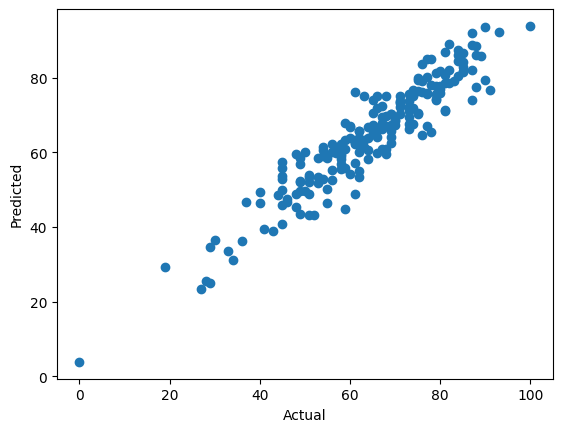

In [26]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

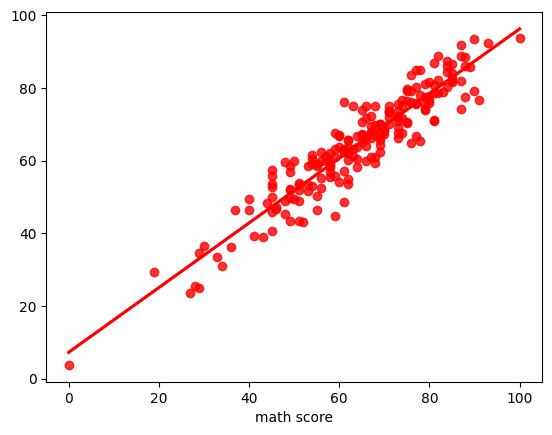

In [27]:
sns.regplot(x=y_test,y=y_pred,ci= None,color ='red');

In [28]:
pred_df = pd.DataFrame({'Actual VAlue': y_test, 'Predicted Value': y_pred, 'Difference':y_test - y_pred})
pred_df

Actual VAlue  Predicted Value  Difference
521            91        76.703125   14.296875
737            53        58.578125   -5.578125
740            80        76.828125    3.171875
660            74        76.734375   -2.734375
411            84        87.484375   -3.484375
..            ...              ...         ...
408            52        43.125000    8.875000
332            62        62.109375   -0.109375
208            74        67.562500    6.437500
613            65        67.328125   -2.328125
78             61        62.312500   -1.312500

[200 rows x 3 columns]